In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [2]:
def create_k_folds(train, k):
    train = train.sample(frac=1)
    folds = []
    for i in range(k):
        folds.append(train[i*len(train)//k : (i+1)*len(train)//k])
    for i in range(k):
        
        expected = pd.DataFrame().assign(label=folds[i]['label'])
        expected.to_csv('./k-fold/expected_' + str(i) + '.csv', index=False)

        new_test = folds[i]
        new_test.drop(['label'], axis=1).to_csv('./k-fold/test_' + str(i) + '.csv', index=False)

        new_train = pd.concat(folds[:i] + folds[i+1:])
        new_train.to_csv('./k-fold/train_' + str(i) + '.csv', index=False)

In [3]:
def run_PCA(folds, alpha, k):
    for i in range(folds):
        subprocess.run(['./PCA', f'./k-fold/train_{i}.csv', f'./k-fold/test_{i}.csv', f'./k-fold/out_{i}.csv', str(alpha), str(k)])

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Aqui es donde se corren los tests

Tener en cuenta que se utiliza el metodo de K-folds para experimentacion asi que recomiendo mantener un Fold pequeño entre 2 y 5. Por otro lado aumentar el K y el Alpha afecta a tiempo de ejecucion. Con los parametros puestos de base se pueden tener resultados optimos 


In [8]:
folds = 3
alpha = 25
k = 3
create_k_folds(train, folds)
run_PCA(folds, alpha, k)

Leeyendo los datos de entrada
Creando matriz de covarianza
Diagonalizando
Cambiando de base el train
Cambiando de base el test
Calculando los k vecinos
Leeyendo los datos de entrada
Creando matriz de covarianza
Diagonalizando
Cambiando de base el train
Cambiando de base el test
Calculando los k vecinos
Leeyendo los datos de entrada
Creando matriz de covarianza
Diagonalizando
Cambiando de base el train
Cambiando de base el test
Calculando los k vecinos


## Experimentacion 

Aqui se hacen los caclulos para armar una matriz de confusion entre cada digito, Ademas se evalua la precision dentro de cada K-fold. Por otro lado se hace la precision y la accuracy total para cada digito

In [35]:
accuracy = []

confusion = np.zeros((10, 10), dtype=int)
for i in range(folds):
    out = pd.read_csv(f'./k-fold/out_{i}.csv')
    expected = pd.read_csv(f'./k-fold/expected_{i}.csv')
    for j in range(len(out)):
        confusion[int(expected.iloc[[j]]['label'])][int(out.iloc[[j]]['Label'])] += 1
    accuracy.append(sum(out['Label'] == expected['label'])/len(out))

accuracyDigit = []
precisionDigit= []
for i in range(10):
    true_positives = confusion[i][i]
    false_positives = sum(confusion[:,i]) - true_positives
    false_negatives = sum(confusion[i,:]) - true_positives
    true_negatives = np.sum(confusion) - true_positives - false_positives - false_negatives
    accuracyDigit.append((true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives))
    precisionDigit.append(confusion[i][i]/sum(confusion[i]))


    

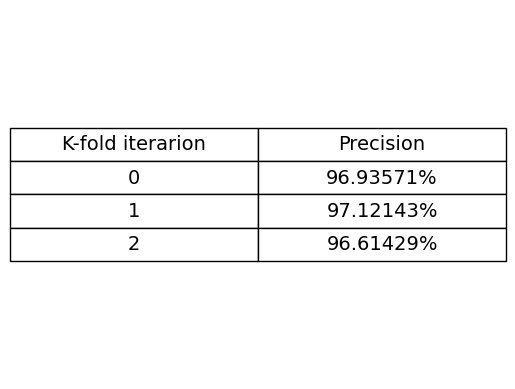

In [39]:
fig, ax = plt.subplots()
table_data = []

for i in range(len(accuracy)):
    row_data = [f'{i}', f'{accuracy[i]*100:.5f}%']
    table_data.append(row_data)
    
table = ax.table(cellText=table_data, colLabels=['K-fold iterarion', 'Precision'], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)

ax.axis('off')


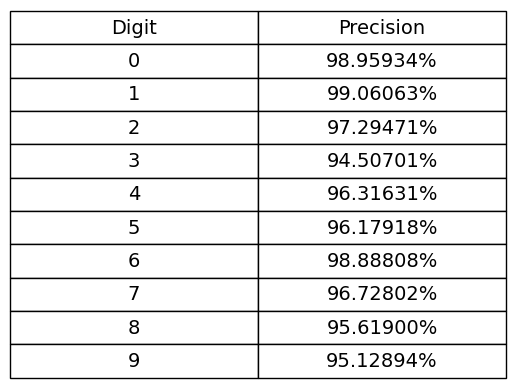

In [40]:


fig, ax = plt.subplots()
table_data = []
for i in range(len(precisionDigit)):
    row_data = [f'{i}', f'{precisionDigit[i]*100:.5f}%']
    table_data.append(row_data)
    
table = ax.table(cellText=table_data, colLabels=['Digit', 'Precision'], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)

ax.axis('off')

# Mostramos la tabla
plt.show()

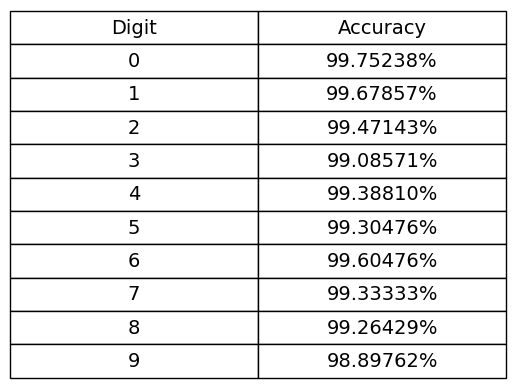

In [41]:
fig, ax = plt.subplots()
table_data = []
for i in range(len(accuracyDigit)):
    row_data = [f'{i}', f'{accuracyDigit[i]*100:.5f}%']
    table_data.append(row_data)
    
table = ax.table(cellText=table_data, colLabels=['Digit', 'Accuracy'], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)

ax.axis('off')

plt.show()


[0.9693571428571428, 0.9712142857142857, 0.9661428571428572]


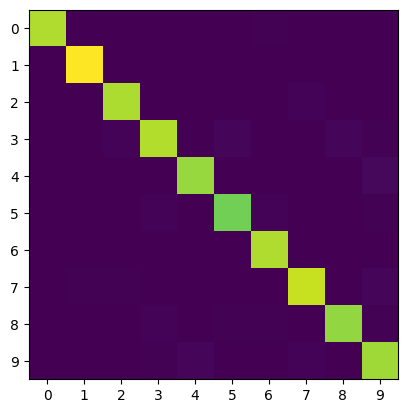

In [12]:

plt.imshow(confusion)
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10));